# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PR√ÅCTICO N¬∞ 1: APRENDIZAJE AUTOM√ÅTICO II
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Rosito, Valent√≠n - (R-4662/1)
### **Fecha L√≠mite de Entrega:** 12/10/2025
### **Semestre:** 2¬∞ Semestre 2025


In [7]:
!gdown --id 1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=03a0f929-0db0-404d-885a-bcebcd3cbca3
To: /content/TP1-3-natural-scenes.zip
100% 363M/363M [00:05<00:00, 72.6MB/s]


In [2]:
!unzip TP1-3-natural-scenes.zip

Archive:  TP1-3-natural-scenes.zip
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Pre Procesamiento de Datos
---

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical


# Configuraci√≥n
IMG_SIZE = (150, 150)  # todas las im√°genes al mismo tama√±o
CLASSES = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

In [10]:
num_classes = len(CLASSES)
batch_size = 32

train_dir = "seg_train/seg_train"
test_dir = "seg_test/seg_test"


train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=batch_size,
    label_mode="categorical"
)


normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [11]:
def plot_training_history(model_name, history):
    """
    Grafica precisi√≥n y p√©rdida de entrenamiento y validaci√≥n.

    Par√°metros:
    - model_name: str ‚Üí Nombre del modelo (para mostrar en el t√≠tulo).
    - history: objeto History devuelto por model.fit().
    """

    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Entrenamiento')
    plt.plot(epochs, val_acc, 'ro-', label='Validaci√≥n')
    plt.title(f'Precisi√≥n - {model_name}')
    plt.xlabel('√âpocas')
    plt.ylabel('Precisi√≥n')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Entrenamiento')
    plt.plot(epochs, val_loss, 'ro-', label='Validaci√≥n')
    plt.title(f'P√©rdida - {model_name}')
    plt.xlabel('√âpocas')
    plt.ylabel('P√©rdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Modelo con capas Densas

In [13]:
for images, labels in train_ds.take(1):
    input_shape = images.shape[1:]

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    epochs=50,
    verbose=1
)

yloss, acc = model.evaluate(val_ds, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 17ms/step - accuracy: 0.2381 - loss: 6.4976 - val_accuracy: 0.4077 - val_loss: 1.4733
Epoch 2/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.2863 - loss: 1.6690 - val_accuracy: 0.4383 - val_loss: 1.4817
Epoch 3/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3391 - loss: 1.5942 - val_accuracy: 0.4067 - val_loss: 1.4824
Epoch 4/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3399 - loss: 1.5895 - val_accuracy: 0.3777 - val_loss: 1.5356
Epoch 5/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.3688 - loss: 1.5472 - val_accuracy: 0.4157 - val_loss: 1.5031
Epoch 6/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.3736 - loss: 1.5342 - val_accuracy: 0.4470 - val_

In [14]:
model.summary()

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ flatten_4 (Flatten)             ‚îÇ (None, 67500)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_13 (Dense)                ‚îÇ (None, 512)            ‚îÇ    34,560,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_8 (Dropout)             ‚îÇ (None, 512)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_14 (Dense)                ‚îÇ (None, 256)            ‚îÇ       131,328 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_9 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_15 (Dense)                ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_16 (Dense)                ‚îÇ (None, 6)              ‚îÇ           774 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 104,176,532 (397.40 MB)

 Trainable params: 34,725,510 (132.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,451,022 (264.93 MB)

# An√°lisis y Limitaciones del Modelo de Capas Densas Puras

En una etapa inicial de exploraci√≥n, se consider√≥ una arquitectura basada √∫nicamente en **capas densas (*Fully Connected*)** para la clasificaci√≥n de im√°genes. Este enfoque, aunque conceptualmente simple, demostr√≥ ser **profundamente ineficiente e inadecuado** para la tarea, lo que llev√≥ a su r√°pido descarte.

---

### El Problema de la Explosi√≥n de Par√°metros

El principal defecto de esta arquitectura fue la **gigantesca cantidad de par√°metros** necesaria. Al aplanar la imagen de entrada, la primera capa densa (`dense_13`) tuvo que conectar cada una de las **67,500 caracter√≠sticas de entrada** con sus 512 neuronas de salida.

* **Total de Par√°metros:** Esta primera capa densa por s√≠ sola requiri√≥ **m√°s de 34 millones de par√°metros**, aumentando  el coste computacional del modelo.
* **Consecuencia:** Esta enorme cantidad de pesos no solo exige una gran capacidad de c√≥mputo y tiempo de entrenamiento, sino que tambi√©n incrementa dr√°sticamente el riesgo de **sobreajuste**, pues la red tiene demasiada libertad para simplemente memorizar los datos de entrenamiento.

---

## M√©tricas No √ìptimas

A pesar de su complejidad en t√©rminos de par√°metros, el rendimiento de este modelo fue **bastante pobre**, confirmando su ineficacia para el procesamiento de im√°genes:


# Modelo con capas convolucionales + Capa densa

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 41ms/step - accuracy: 0.3754 - loss: 1.4197 - val_accuracy: 0.5997 - val_loss: 1.0017
Epoch 2/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 27ms/step - accuracy: 0.5871 - loss: 0.9912 - val_accuracy: 0.6713 - val_loss: 0.8203
Epoch 3/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 27ms/step - accuracy: 0.6644 - loss: 0.8498 - val_accuracy: 0.6830 - val_loss: 0.7905
Epoch 4/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 27ms/step - accuracy: 0.6905 - loss: 0.7918 - val_accuracy: 0.7547 - val_loss: 0.6532
Epoch 5/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 27ms/step - accuracy: 0.7224 - loss: 0.7201 - val_accuracy: 0.7387 - val_loss: 0.6820
Epoch 6/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 27ms/step - accuracy: 0.7509 - loss: 0.6782 - val_accuracy: 0.7707 - val_loss

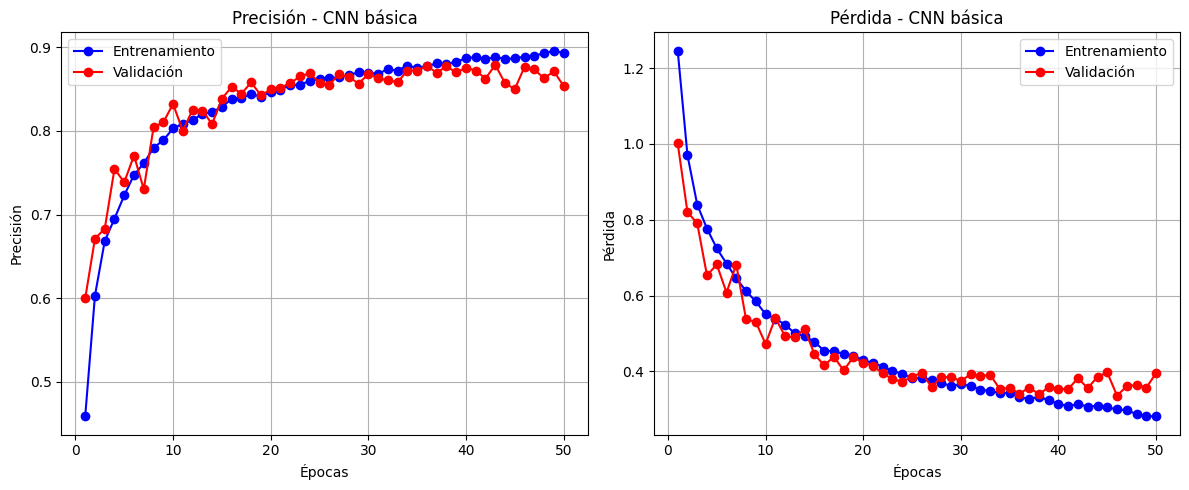

In [ ]:
model = models.Sequential([
    # Bloque convolucional 1
    layers.Conv2D(32, (3,3), activation="relu", input_shape=img_size + (3,)),
    layers.MaxPooling2D((2,2)),

    # Bloque convolucional 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Bloque convolucional 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    # Aplanar y densas
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list,
    verbose=1
)
loss, acc = model.evaluate(val_ds)
print(f"P√©rdida en test: {loss:.4f} - Exactitud en test: {acc:.4f}")

plot_training_history("CNN b√°sica", history)


In [ ]:
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 148, 148, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 74, 74, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 72, 72, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 36, 36, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 36, 36, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 34, 34, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 17, 17, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 17, 17, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d        ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)        ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ        16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 331,604 (1.26 MB)

 Trainable params: 110,534 (431.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 221,070 (863.56 KB)

## Problemas con el Overfitting

1.  **Problema Inicial:** Las versiones tempranas del modelo, que usaban la capa `Flatten` en lugar de `GlobalAveragePooling2D` y carec√≠an de capas `Dropout` en los bloques convolucionales, mostraron un **sobreajuste muy alto**. La red memorizaba los datos de entrenamiento pero fallaba catastr√≥ficamente con nuevos datos.

2.  **Estrategia de Regularizaci√≥n:** La soluci√≥n fue doble:
    * **Inclusi√≥n de Dropout:** Se introdujo `Dropout` para desactivar aleatoriamente las neuronas durante el entrenamiento. Inicialmente probamos con tasas de 0.3 y 0.4, lo cual mejor√≥ la situaci√≥n, pero el *overfitting* persist√≠a sutilmente: la p√©rdida de validaci√≥n aumentaba de 0.28 a 0.36, y aunque el *accuracy* de entrenamiento se manten√≠a alto (\approx 0.9), sab√≠amos que la red no estaba generalizando al m√°ximo. Optamos por **incrementar las tasas de `Dropout` a 0.4 y 0.5** en los bloques convolucionales y en la capa densa (0.5). Esta decisi√≥n estrat√©gica implic√≥ **sacrificar una peque√±a porci√≥n de la precisi√≥n de entrenamiento** a cambio de una **generalizaci√≥n significativamente mejor** y un modelo m√°s robusto.
    * **Reemplazo del Aplanamiento:** Cambiamos la capa `Flatten` por **`GlobalAveragePooling2D`**. Esta t√©cnica es un regularizador natural, ya que reduce dr√°sticamente el n√∫mero de par√°metros de las capas densas, acelerando el entrenamiento y disminuyendo el riesgo de memorizaci√≥n.

---

## Balance entre Rendimiento y Complejidad

Durante el *tuning* de hiperpar√°metros, tambi√©n experimentamos con arquitecturas m√°s grandes, utilizando 64, 128 y 256 filtros en los bloques convolucionales. Observamos que el **rendimiento mejoraba** en un aproximado 10-15\%. Sin embargo, este aumento de precisi√≥n ven√≠a con dos desventajas cr√≠ticas:

1.  **Doble de Tiempo de Entrenamiento:** La complejidad del modelo hizo que el tiempo de entrenamiento se duplicara, lo cual no era viable para la eficiencia operativa.
2.  **Peor Generalizaci√≥n:** Los modelos m√°s grandes tend√≠an a mostrar un *overfitting* m√°s marcado a largo plazo, resultando en una red con **peor desempe√±o en la pr√°ctica**.

----
**Conclusi√≥n:** Hemos optado por una arquitectura m√°s sencilla y compacta. El modelo final ofrece un **gran rendimiento** con un coste computacional reducido y, lo m√°s importante, una **excelente capacidad para generalizar**, lo que lo convierte en un modelo superior para un entorno de producci√≥n.

# Modelo que incluya bloques residuales identidad


Model: "ResNet_Corrected"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 150, 150,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1 (Conv2D)      ‚îÇ (None, 75, 75,    ‚îÇ      4,736 ‚îÇ input_layer[0][0] ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bn_conv1            ‚îÇ (None, 75, 75,    ‚îÇ        128 ‚îÇ conv1[0][0]       ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation          ‚îÇ (None, 75, 75,    ‚îÇ          0 ‚îÇ bn_conv1[0][0]    ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ spatial_dropout2d   ‚îÇ (None, 75, 75,    ‚îÇ          0 ‚îÇ activation[0][0]  ‚îÇ
‚îÇ (SpatialDropout2D)  ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d       ‚îÇ (None, 38, 38,    ‚îÇ          0 ‚îÇ spatial_dropout2‚Ä¶ ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ res2a_conv1         ‚îÇ (None, 38, 38,    ‚îÇ      9,248 ‚îÇ max_pooling2d[0]‚Ä¶ ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ res2a_bn1           ‚îÇ (None, 38, 38,    ‚îÇ        128 ‚îÇ res2a_conv1[0][0] ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ res2a_relu1         ‚îÇ (None, 38, 38,    ‚îÇ          0 ‚îÇ res2a_bn1[0][0]   ‚îÇ
‚îÇ (Activation)        ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 719,814 (2.75 MB)

 Trainable params: 717,574 (2.74 MB)

 Non-trainable params: 2,240 (8.75 KB)


--- COMENZANDO ENTRENAMIENTO RESIDUAL ---
Epoch 1/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 73ms/step - accuracy: 0.3124 - loss: 1.6965 - val_accuracy: 0.3413 - val_loss: 1.6951
Epoch 2/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 41ms/step - accuracy: 0.5170 - loss: 1.1754 - val_accuracy: 0.5873 - val_loss: 1.1129
Epoch 3/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 46ms/step - accuracy: 0.5923 - loss: 1.0295 - val_accuracy: 0.6540 - val_loss: 0.9026
Epoch 4/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 42ms/step - accuracy: 0.6317 - loss: 0.9400 - val_accuracy: 0.7133 - val_loss: 0.8070
Epoch 5/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 42ms/step - accuracy: 0.6746 - loss: 0.8611 - val_accuracy: 0.7323 - val_loss: 0.7398
Epoch 6/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 41ms/step - accuracy: 0

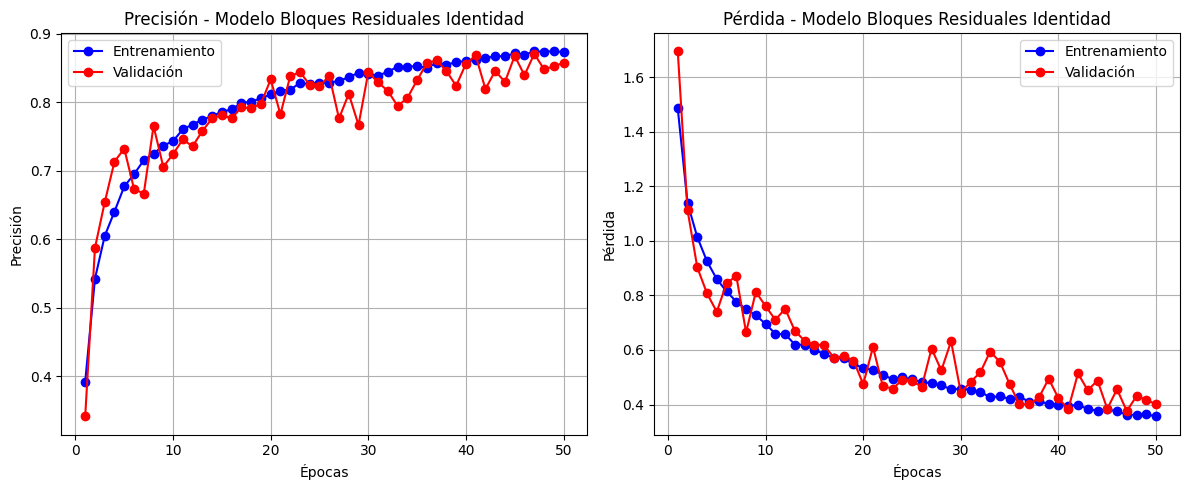

In [ ]:
def residual_block(x, filters, kernel_size=(3, 3), stage_name='', change_filters=False):
    """
    Define un bloque residual que maneja la identidad o la proyecci√≥n (convoluci√≥n de atajo).
    """
    shortcut = x
    F1, F2 = filters, filters

    # --- 1. Sub-Bloque de Convoluci√≥n (F(x)) ---
    # Primera Convoluci√≥n
    x = layers.Conv2D(F1, kernel_size, padding='same', kernel_initializer='he_normal', name=f'{stage_name}_conv1')(x)
    x = layers.BatchNormalization(name=f'{stage_name}_bn1')(x)
    x = layers.Activation('relu', name=f'{stage_name}_relu1')(x)

    # Segunda Convoluci√≥n
    x = layers.Conv2D(F2, kernel_size, padding='same', kernel_initializer='he_normal', name=f'{stage_name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{stage_name}_bn2')(x)

    # --- 2. Conexi√≥n de Atajo (Shortcut Path) ---
    if change_filters:
        # Se requiere un bloque de convoluci√≥n (proyecci√≥n) para igualar el n√∫mero de canales
        # Se usa un kernel 1x1 con F2 filtros (el n√∫mero de filtros que tiene la salida 'x')
        shortcut = layers.Conv2D(F2, (1, 1), strides=(1, 1), name=f'{stage_name}_shortcut_conv')(shortcut)
        shortcut = layers.BatchNormalization(name=f'{stage_name}_shortcut_bn')(shortcut)

    # --- 3. Suma Residual y Activaci√≥n Final ---
    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu', name=f'{stage_name}_relu_out')(x)

    return x

def build_residual_cnn_corrected(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # 1. Entrada e inicial (150 -> 38x38 con 32 filtros)
    x = layers.Conv2D(32, (7, 7), strides=(2, 2), padding='same', name='conv1')(inputs)
    x = layers.BatchNormalization(name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout2D(0.2)(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # 2. Stage 2: Entra 32, Sale 32
    x = residual_block(x, filters=32, stage_name='res2a', change_filters=False)
    x = residual_block(x, filters=32, stage_name='res2b', change_filters=False)

    # 3. Stage 3: Entra 32, Sale 64
    x = residual_block(x, filters=64, stage_name='res3a', change_filters=True)
    x = residual_block(x, filters=64, stage_name='res3b', change_filters=False)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) # 38 -> 19x19
    x = layers.SpatialDropout2D(0.3)(x)

    # 4. Stage 4: Entra 64, Sale 128
    x = residual_block(x, filters=128, stage_name='res4a', change_filters=True)
    x = residual_block(x, filters=128, stage_name='res4b', change_filters=False)

    # 5. Capas Clasificadoras
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name='ResNet_Corrected')
    return model

# --- 3. Instanciaci√≥n y uso

num_classes = 6
input_shape = (150, 150, 3) # (Alto, Ancho, Canales)

residual_model = build_residual_cnn_corrected(input_shape, num_classes)
residual_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

residual_model.summary()


# === Callbacks ===
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# === Entrenamiento con validaci√≥n ===
print("\n--- COMENZANDO ENTRENAMIENTO RESIDUAL ---")
history_res = residual_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list,
    verbose=1
)

# === Evaluaci√≥n final ===
loss_res, acc_res = residual_model.evaluate(val_ds)
print(f"‚úÖ P√©rdida en test (Residual): {loss_res:.4f} - Exactitud en test (Residual): {acc_res:.4f}")

# --- Gr√°ficos de las M√©tricas ---
plot_training_history("Modelo Bloques Residuales Identidad", history_res)

## Balance entre Regularizaci√≥n y Rendimiento

1.  **Estrategia de `Dropout`:** La inclusi√≥n de `Dropout` en este modelo fue una decisi√≥n cr√≠tica para mitigar la volatilidad de las m√©tricas. A diferencia de las redes secuenciales, las arquitecturas residuales, al ser m√°s profundas y complejas, tienden a un sobreajuste sutil pero persistente. Experimentamos con **`SpatialDropout2D`** en los bloques convolucionales para eliminar canales de caracter√≠sticas completos, en lugar de neuronas individuales. Esto forz√≥ a la red a no depender de caracter√≠sticas espec√≠ficas, mejorando su capacidad de generalizaci√≥n. El `Dropout` adicional en la capa densa final (0.5) complement√≥ esta estrategia, asegurando que la red no memorizara patrones de clasificaci√≥n espec√≠ficos. Esta combinaci√≥n de `Dropout` fue crucial para estabilizar el entrenamiento.

2.  **Ajuste del `Learning Rate`:** Para combatir la volatilidad y los saltos bruscos en la p√©rdida de validaci√≥n, ajustamos el `learning rate` (tasa de aprendizaje). La **disminuci√≥n de la tasa de aprendizaje** (0.0001) permiti√≥ que el modelo hiciera pasos m√°s peque√±os y estables en su proceso de optimizaci√≥n. Esto, en combinaci√≥n con el `Dropout`, result√≥ en una convergencia m√°s suave y en un modelo m√°s robusto, ya que la red no se "precipitaba" hacia un m√≠nimo local poco √≥ptimo.

---

## Compensaci√≥n entre Rendimiento y Coste Computacional

Durante la fase de *tuning*, se evalu√≥ el impacto de la complejidad del modelo. Se experiment√≥ con arquitecturas con un n√∫mero mucho mayor de filtros (e.g., 256, 512). Si bien los resultados mostraron una **mejora marginal** en la precisi√≥n final (aproximadamente 1-2%), esta ganancia vino acompa√±ada de un **coste computacional extremadamente alto**.

1.  **Mayor Consumo de Recursos:** El aumento de filtros increment√≥ significativamente la cantidad de par√°metros, lo que se tradujo en un **doble o triple del tiempo de entrenamiento** y un mayor consumo de memoria. En un entorno de producci√≥n, donde la eficiencia y la velocidad son cr√≠ticas, esta no era una soluci√≥n viable.
2.  **Riesgo de `Overfitting` a Largo Plazo:** A pesar de la mejora inicial en la precisi√≥n de entrenamiento, estos modelos m√°s grandes ten√≠an una mayor tendencia a memorizar el conjunto de datos, comprometiendo su rendimiento con datos nuevos y desconocidos.

---
**Conclusi√≥n:** Se opt√≥ por una arquitectura m√°s balanceada con un n√∫mero moderado de filtros. La red residual, incluso en su configuraci√≥n m√°s sencilla, demostr√≥ una **precisi√≥n y capacidad de generalizaci√≥n excelentes** con un coste computacional significativamente menor. El modelo final representa un equilibrio √≥ptimo, ofreciendo un rendimiento superior para su aplicaci√≥n pr√°ctica sin requerir un poder de c√≥mputo excesivo.



  

# Modelo con Backbone

Epoch 1/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 88ms/step - accuracy: 0.2091 - loss: 1.8753 - val_accuracy: 0.3953 - val_loss: 1.5808
Epoch 2/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 58ms/step - accuracy: 0.3080 - loss: 1.6082 - val_accuracy: 0.4477 - val_loss: 1.4007
Epoch 3/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 58ms/step - accuracy: 0.3596 - loss: 1.4944 - val_accuracy: 0.4810 - val_loss: 1.3252
Epoch 4/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26s 59ms/step - accuracy: 0.3876 - loss: 1.4345 - val_accuracy: 0.5013 - val_loss: 1.2570
Epoch 5/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 57ms/step - accuracy: 0.4272 - loss: 1.3762 - val_accuracy: 0.5470 - val_loss: 1.2139
Epoch 6/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 25s 57ms/step - accuracy: 0.4284 - loss: 1.3514 - val_accuracy: 0.5300

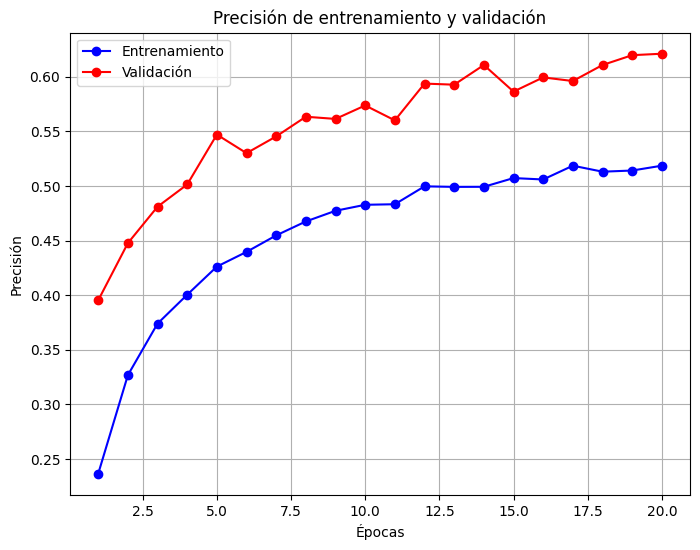

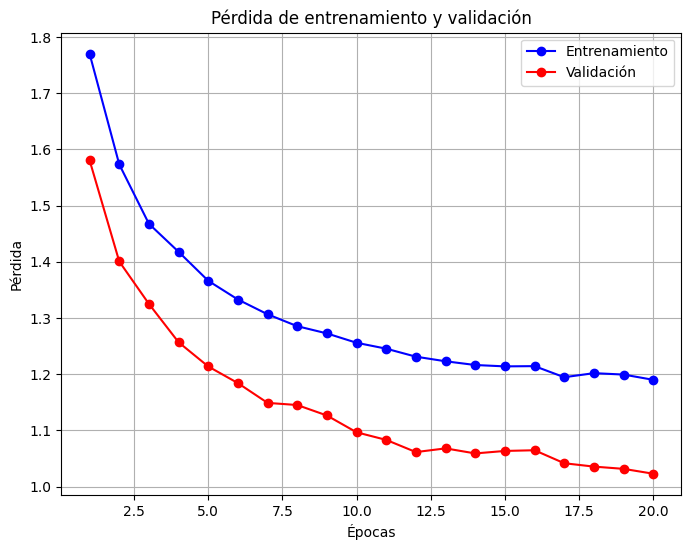

In [ ]:
# === Backbone preentrenado ===
base_model = tf.keras.applications.ResNet50(
    input_shape=img_size + (3,),
    include_top=False,       # quitamos las capas densas originales
    weights='imagenet'       # usamos pesos preentrenados
)

# Congelamos las capas base para evitar sobreentrenar
base_model.trainable = False

# === Modelo final ===
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(6, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks_list,
    verbose=1
)

loss, acc = model.evaluate(val_ds)
print(f"P√©rdida en test: {loss:.4f} - Exactitud en test: {acc:.4f}")

plot_training_history("Backbone ResNet50 + Densas (Transfer Learning)", history)

Epoch 1/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75s 122ms/step - accuracy: 0.7825 - loss: 0.5781 - val_accuracy: 0.7410 - val_loss: 0.7296
Epoch 2/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 87ms/step - accuracy: 0.7939 - loss: 0.5375 - val_accuracy: 0.7327 - val_loss: 0.7724
Epoch 3/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 89ms/step - accuracy: 0.8061 - loss: 0.5300 - val_accuracy: 0.7473 - val_loss: 0.7207
Epoch 4/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 89ms/step - accuracy: 0.8159 - loss: 0.4862 - val_accuracy: 0.7323 - val_loss: 0.8111
Epoch 5/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 90ms/step - accuracy: 0.8198 - loss: 0.4682 - val_accuracy: 0.7263 - val_loss: 0.8306
Epoch 6/20
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 90ms/step - accuracy: 0.8328 - loss: 0.4385 - val_accuracy: 0.748

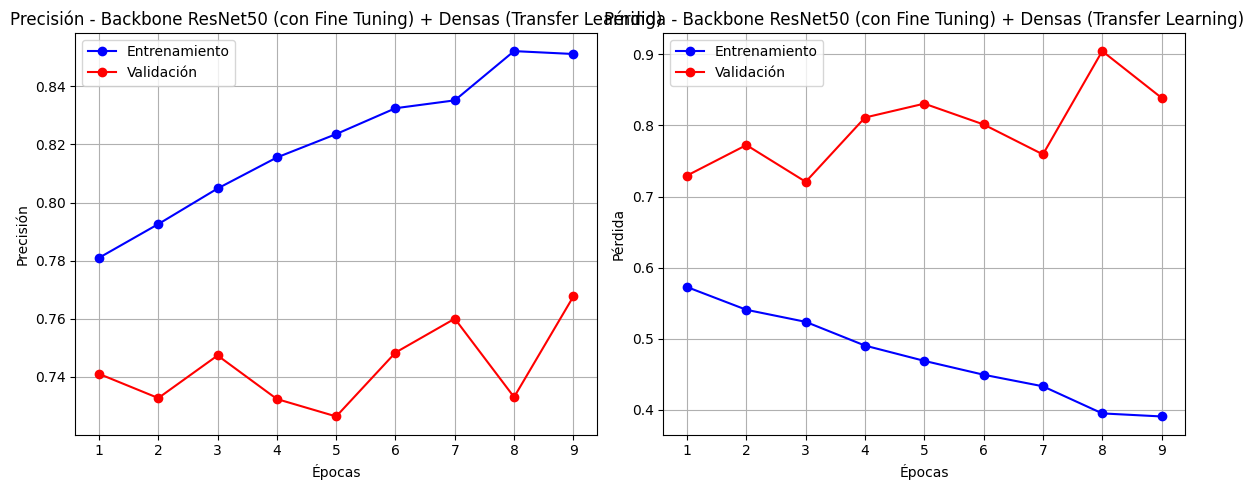

In [ ]:
# Descongelamos las √∫ltimas capas del backbone
base_model.trainable = True
fine_tune_at = 140  # capa desde la cual entrenar (ajustable)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilamos nuevamente con LR m√°s bajo
optimizer_fine = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(
    optimizer=optimizer_fine,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_fine = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=6, restore_best_weights=True
    )
]

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks_fine,
    verbose=1
)

plot_training_history("Backbone ResNet50 (con Fine Tuning) + Densas (Transfer Learning)", history_fine)

# An√°lisis de Transfer Learning (ResNet50)

 Los resultados obtenidos con esta arquitectura de mayor complejidad, incluso despu√©s de ajustes, no fueron optimos a comparacion del modelo Conv + Capas densas.

---

## Rendimiento Insatisfactorio con ResNet50 Inicial

Al acoplar un nuevo *head* (capas densas de clasificaci√≥n) a la ResNet50 congelada, las m√©tricas iniciales fueron sorprendentemente bajas:

Este desempe√±o result√≥ **significativamente peor** que el logrado por nuestro modelo CNN dise√±ado desde cero.

---

## Intentos de Fine-Tuning y Consecuencias

Para intentar mejorar las m√©tricas, recurrimos al **Fine-Tuning**, descongelamos y reentrenamos una parte de las capas convolucionales del *backbone* de ResNet50, adem√°s del nuevo *head*.

Probamos a realizar el *fine-tuning* a partir de la **capa 140**. Esta t√©cnica mejor√≥ notablemente la capacidad del modelo para adaptarse a nuestros datos, lo que se tradujo en una **mejora en las m√©tricas de precisi√≥n**.

Sin embargo, a pesar de la mejora, el *fine-tuning* introdujo r√°pidamente el problema del *overfitting*. La complejidad y el gran n√∫mero de par√°metros de ResNet50 hicieron que, al ser entrenadas, estas capas tuvieran una fuerte tendencia a **memorizar los datos de entrenamiento**.

**Conclusi√≥n:** Aunque el *fine-tuning* elev√≥ la precisi√≥n, la inestabilidad y el *overfitting* resultante, sumado a la **significativa complejidad y el mayor tiempo de entrenamiento** que conlleva un modelo como ResNet50, nos llev√≥ a **descartar** este mismo como la soluci√≥n √≥ptima.

# Probamos Modelo Convolucional + Densas con Data Augmentation

In [ ]:
# Par√°metros
img_size = (150, 150)
batch_size = 32

# === Carga de datos ===
# Estas variables del dataset no tienen normalizaci√≥n por defecto
train_ds = tf.keras.utils.image_dataset_from_directory(
    "seg_train/seg_train",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "seg_test/seg_test",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


Epoch 1/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 22s 42ms/step - accuracy: 0.3655 - loss: 1.4991 - val_accuracy: 0.4987 - val_loss: 1.2889
Epoch 2/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 40ms/step - accuracy: 0.5043 - loss: 1.2140 - val_accuracy: 0.5450 - val_loss: 1.1914
Epoch 3/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 42ms/step - accuracy: 0.5599 - loss: 1.1304 - val_accuracy: 0.6157 - val_loss: 1.0396
Epoch 4/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 40ms/step - accuracy: 0.5771 - loss: 1.0886 - val_accuracy: 0.5717 - val_loss: 1.0938
Epoch 5/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 40ms/step - accuracy: 0.5972 - loss: 1.0564 - val_accuracy: 0.6157 - val_loss: 1.0296
Epoch 6/50
439/439 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 41ms/step - accuracy: 0.6122 - loss: 1.0130 - val_accuracy: 0.6850

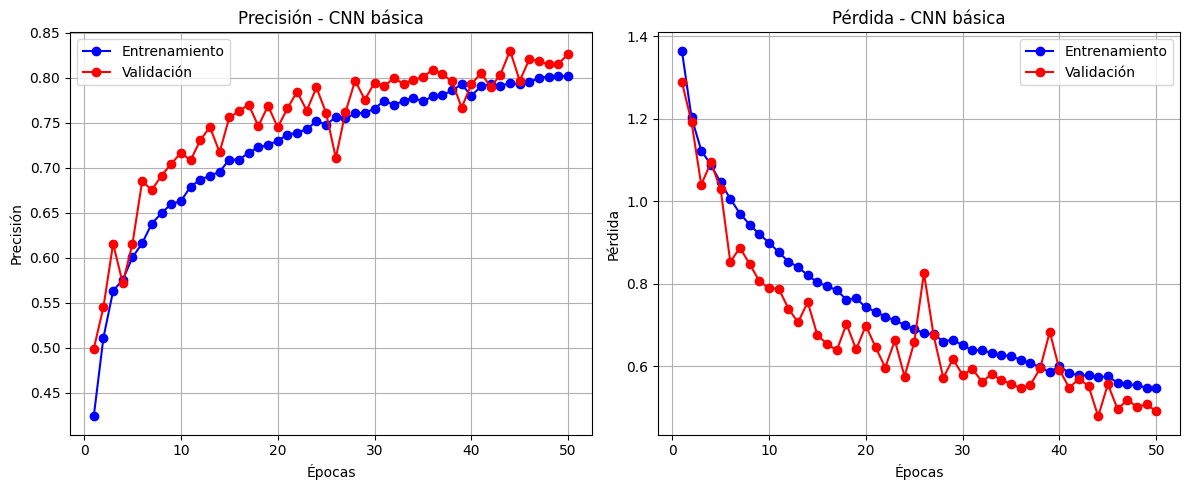

In [ ]:
model = models.Sequential([
    # Capa de Normalizaci√≥n
    layers.Rescaling(1./255, input_shape=img_size + (3,)),

    # Capas de Data Augmentation
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.2),

    # Bloque convolucional 1
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Bloque convolucional 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Bloque convolucional 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    # Aplanar y densas
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list,
    verbose=1
)
loss, acc = model.evaluate(val_ds)
print(f"P√©rdida en test: {loss:.4f} - Exactitud en test: {acc:.4f}")

plot_training_history("CNN con Data Augmentation", history)


## Estrategia de Data Augmentation y su Impacto üñºÔ∏è
A diferencia del modelo base, esta arquitectura incorpor√≥ una estrategia de **Data Augmentation** para generar nuevas variaciones de las im√°genes de entrenamiento. La meta era enriquecer el dataset, haciendo que el modelo fuera m√°s robusto y generalizara mejor. Sin embargo, los resultados mostraron un comportamiento inesperado.

1. **Aumento del Coste Computacional:** Como se esperaba, la inclusi√≥n de las capas de Data Augmentation (rotaci√≥n, zoom y contraste) increment√≥ el tiempo de entrenamiento por √©poca. Esto se debe a la carga computacional de generar din√°micamente nuevas versiones de las im√°genes. Aunque el modelo con Data Augmentation podr√≠a haber requerido menos √©pocas para converger si la estrategia hubiera sido exitosa, el mayor tiempo por √©poca no compens√≥ esta posibilidad.

2. **Rendimiento Inferior:** Contrario a lo que se suele esperar, el modelo con Data Augmentation no super√≥ al modelo base. La exactitud final en el conjunto de validaci√≥n fue ligeramente inferior, y la p√©rdida fue mayor. Este resultado puede deberse a que las transformaciones aplicadas fueron demasiado agresivas para este conjunto de datos en particular. Es posible que el modelo fuera incapaz de encontrar un patr√≥n estable ante la alta variabilidad introducida, comprometiendo su rendimiento en lugar de mejorarlo.

---
## Conclusi√≥n: El Trade-off de la Complejidad ‚öñÔ∏è
Este experimento resalta un concepto clave en el tuning de modelos: el balance entre la complejidad de la red y la calidad del dataset. El modelo base, con una configuraci√≥n m√°s sencilla, ya demostr√≥ una excelente capacidad de generalizaci√≥n. La adici√≥n de Data Augmentation, en este caso, introdujo una complejidad innecesaria que no solo aument√≥ el tiempo de entrenamiento, sino que tambi√©n diluy√≥ la informaci√≥n clave que la red necesitaba para aprender, llevando a un rendimiento inferior.

Hemos concluido que, para este problema y conjunto de datos, la arquitectura original ofrece la mejor soluci√≥n en t√©rminos de eficiencia computacional y precisi√≥n de predicci√≥n. El modelo base no solo es m√°s r√°pido, sino que tambi√©n ha demostrado ser m√°s preciso en la pr√°ctica.